<a href="https://colab.research.google.com/github/Venchislav/Neural-Networks/blob/main/BatchNorm%7C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd

concrete = pd.read_csv('/content/sample_data/concrete.csv')
df = concrete.copy()

df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

X_train = df_train.drop('CompressiveStrength', axis=1)
X_valid = df_valid.drop('CompressiveStrength', axis=1)
y_train = df_train['CompressiveStrength']
y_valid = df_valid['CompressiveStrength']

input_shape = [X_train.shape[1]]

In [42]:
from tensorflow import keras
from tensorflow.keras import layers

In [43]:
model = keras.Sequential([
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu', input_shape=input_shape),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(1),
])

In [44]:
model.compile(
    optimizer='sgd',
    loss='mae',
    metrics=['mae']
)

In [45]:
EP = 100

In [46]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=64,
    epochs=EP,
    verbose=0
)

Minimum in val_loss: 5.062285900115967


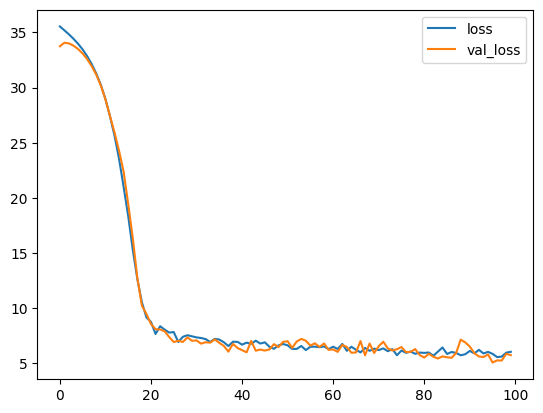

In [47]:
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print(f"Minimum in val_loss: {history_df['val_loss'].min()}")